In [ ]:
!pip install mediapipe

✅ Processed image saved: output/output_testImg.png


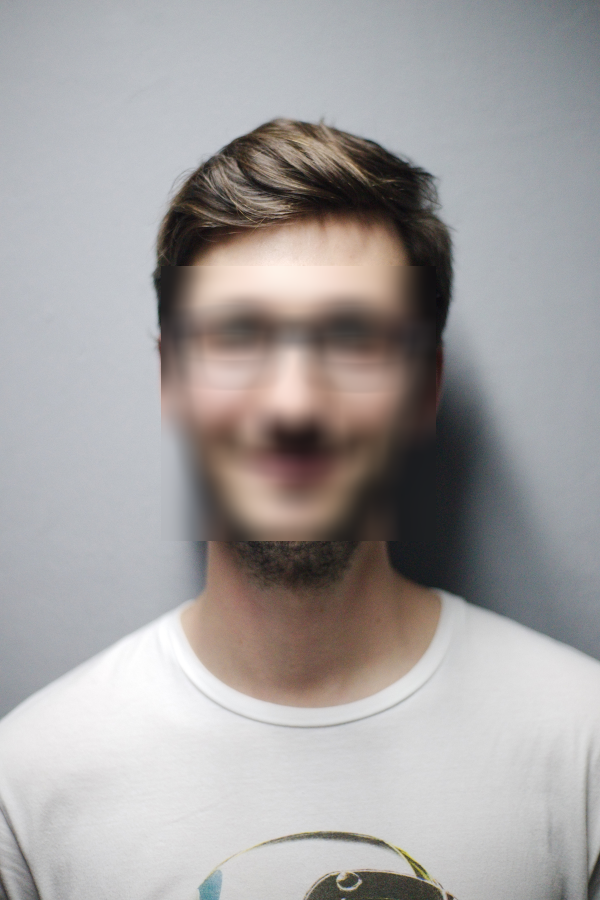

✅ Processed no-face image saved: output/output_testNoFace.jpg


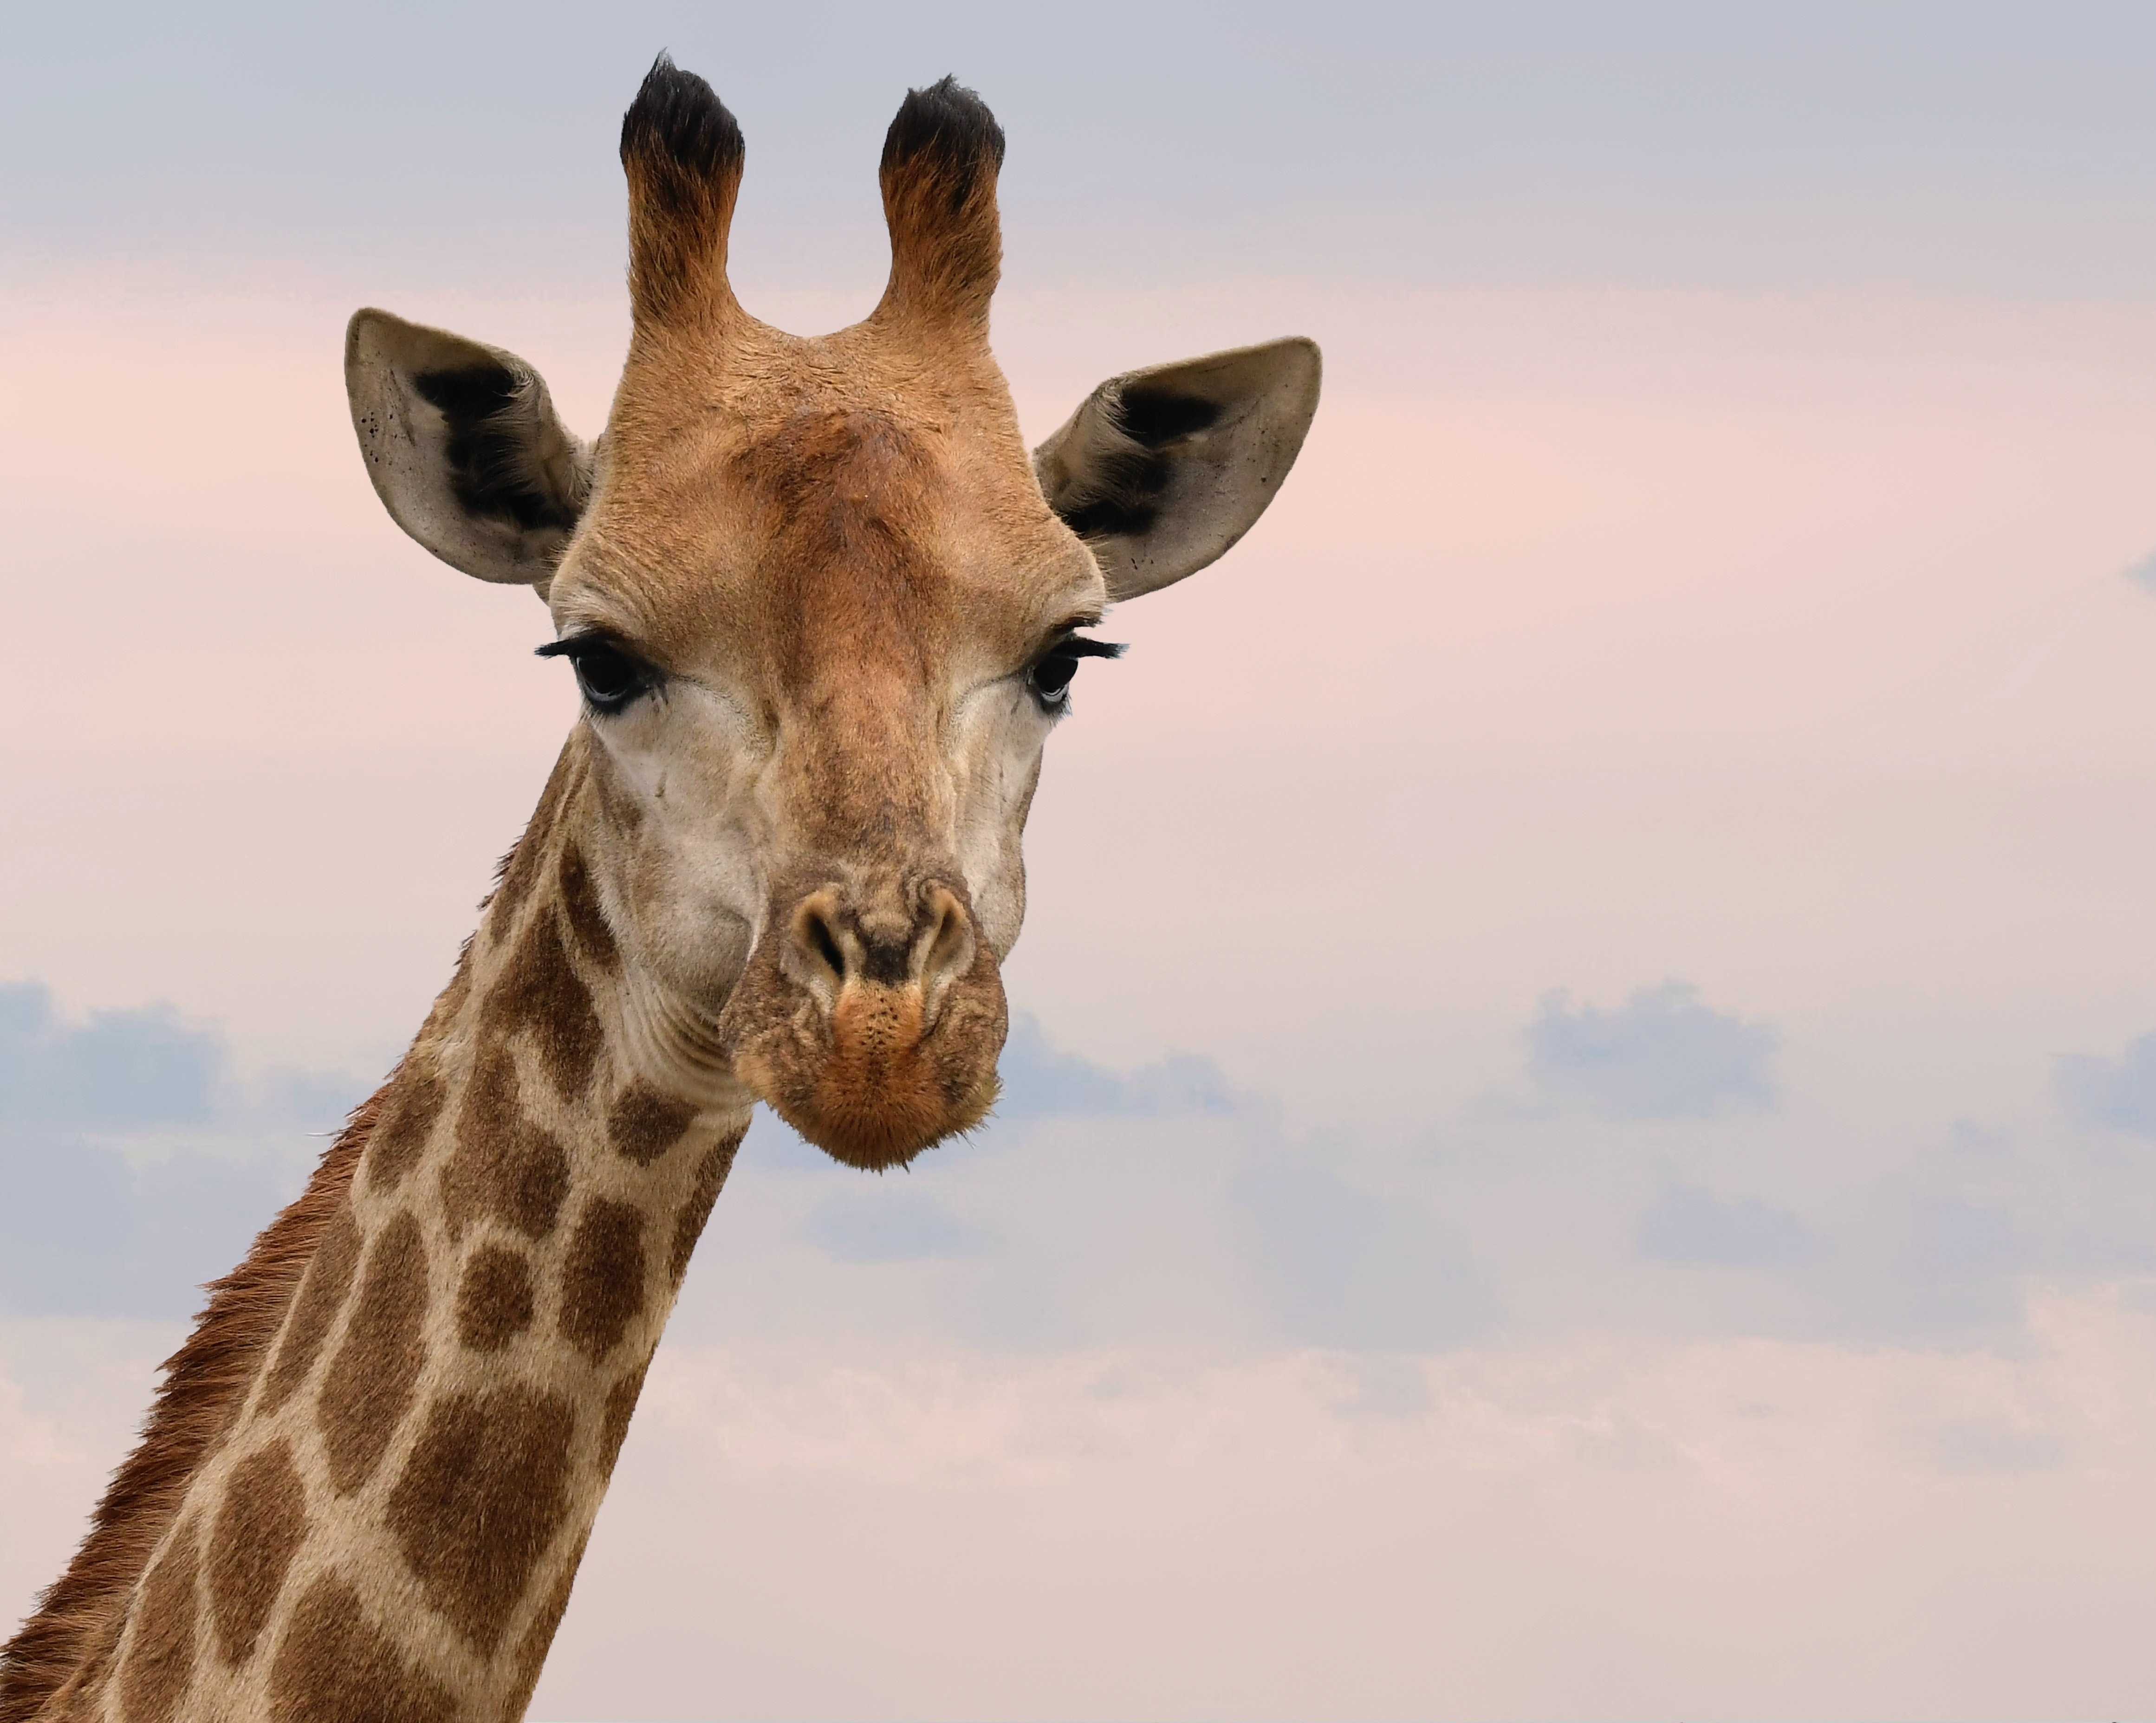

✅ Processed video saved: output/output_testVideo.mp4


In [9]:
import os
import cv2
import mediapipe as mp
from IPython.display import Video, Image, display

# Utility function to process frames and blur faces
def process_img(img, face_detection):
    H, W, _ = img.shape
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    out = face_detection.process(img_rgb)

    if out.detections is not None:
        for detection in out.detections:
            bbox = detection.location_data.relative_bounding_box
            x1 = int(bbox.xmin * W)
            y1 = int(bbox.ymin * H)
            w = int(bbox.width * W)
            h = int(bbox.height * H)

            img[y1:y1 + h, x1:x1 + w, :] = cv2.blur(img[y1:y1 + h, x1:x1 + w, :], (30, 30))

    return img


# Setup
input_dir = 'data'
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)

mp_face_detection = mp.solutions.face_detection
face_detector = mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5)

# ---------- Test 1: Process an Image ----------
img_path = os.path.join(input_dir, 'testImg.png')
img = cv2.imread(img_path)

if img is not None:
    processed_img = process_img(img, face_detector)
    out_path = os.path.join(output_dir, 'output_testImg.png')
    cv2.imwrite(out_path, processed_img)
    print("✅ Processed image saved:", out_path)
    display(Image(filename=out_path))
else:
    print("❌ Image not found:", img_path)

# ---------- Test 2: Process an Image Without Faces ----------
img_path2 = os.path.join(input_dir, 'testNoFace.jpg')
img2 = cv2.imread(img_path2)

if img2 is not None:
    processed_img2 = process_img(img2, face_detector)
    out_path2 = os.path.join(output_dir, 'output_testNoFace.jpg')
    cv2.imwrite(out_path2, processed_img2)
    print("✅ Processed no-face image saved:", out_path2)
    display(Image(filename=out_path2))
else:
    print("❌ Image not found:", img_path2)

# ---------- Test 3: Process a Video ----------
video_path = os.path.join(input_dir, 'testVideo.mp4')
cap = cv2.VideoCapture(video_path)

if cap.isOpened():
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    out_video_path = os.path.join(output_dir, 'output_testVideo.mp4')
    writer = cv2.VideoWriter(out_video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    ret, frame = cap.read()
    while ret:
        processed_frame = process_img(frame, face_detector)
        writer.write(processed_frame)
        ret, frame = cap.read()

    cap.release()
    writer.release()
    print("✅ Processed video saved:", out_video_path)
    # display(Video(filename=out_video_path, embed=True, width=480))
# else:
#     print("❌ Could not open video file:", video_path)